# Análise de Dois Modelos Completos - Modelagem e ML

## Modelo 1 - Regressão - Predição Preços Casas - Muitas Features

Seguir os estudos com o seguinte dataset: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv

In [1]:
import pandas as pd

housing = pd.read_csv('train.csv')

housing.head()

C:\Users\pasch\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pasch\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\pasch\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
## checando os missings

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 1 - Limpeza de Colunas com Muitos Missings

In [4]:
housing.isnull().mean() * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [6]:
## selecionando de forma automática colunas com mais de 30% de missings

missing = housing.isnull().mean() * 100

cols_to_drop = missing[missing > 30].index.tolist()

housing.drop(cols_to_drop, axis=1, inplace=True)

In [7]:
## separando as colunas em features e target

X = housing.drop(columns=['SalePrice', 'Id'])
y = housing['SalePrice']

## 2 - Separação da Base em Treino e Teste

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [9]:
## separação das features em numéricas e categóricas

num = X_train.select_dtypes(include=['number']).columns
cat = X_train.select_dtypes(include=['object']).columns

In [19]:
## importando as bibliotecas que serão utilizadas em ML

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.feature_selection import RFE
from category_encoders import OneHotEncoder, TargetEncoder

## 3 - Criação de Pipelines para Tratar as Features

In [20]:
num_pipeline = Pipeline([
    ('imputernum', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputercat', SimpleImputer(strategy='most_frequent')),
    ('encoder', TargetEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num),
        ('cat', cat_pipeline, cat)
    ]
)

from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputernum',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [22]:
y_pred = pipe.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred)/ y_test)) * 100
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 19740.619434366832
Mean Absolute Percentage Error (MAPE): 11.813969052498088%
Mean Squared Error (MSE): 983097703.1702662
Root Mean Squared Error (RMSE): 31354.388898051675


# Tentativa de Melhorar o Modelo

In [24]:
## importando as bibliotecas que serão utilizadas em ML

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.feature_selection import RFE
from category_encoders import OneHotEncoder, TargetEncoder, CatBoostEncoder
from sklearn.ensemble import GradientBoostingRegressor

Mudança de modelo para GradientBoostin, mudança de encoder como tentativa de melhorar a predição do modelo, e inserir a etapa com RFE, que serve de forma simples para selecionar as melhores 'n' features para o modelo

In [27]:
num_pipeline = Pipeline([
    ('imputernum', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputercat', SimpleImputer(strategy='most_frequent')),
    ('encoder', CatBoostEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num),
        ('cat', cat_pipeline, cat)
    ]
)

from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('rfe', RFE(RandomForestRegressor(n_estimators=50), n_features_to_select=40)),
    ('regressor', GradientBoostingRegressor())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred)/ y_test)) * 100
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 15760.748707058341
Mean Absolute Percentage Error (MAPE): 9.455021406653868%
Mean Squared Error (MSE): 632631792.4773425
Root Mean Squared Error (RMSE): 25152.17271881979


### Verificando Visualmente Previsto x Real

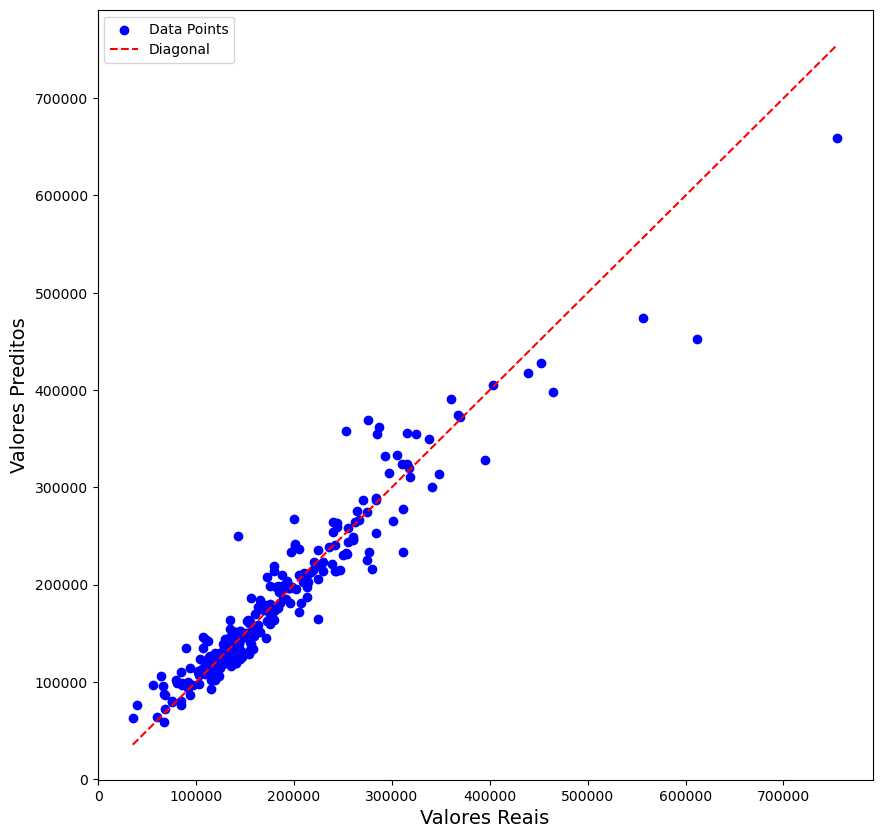

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.scatter(y_test, y_pred, c='blue', label='Data Points')

plt.xlabel('Valores Reais', fontsize=14)
plt.ylabel('Valores Preditos', fontsize=14)

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Diagonal')

plt.legend()

plt.show()